In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../DataOut/bus_trip_all_points.csv')
anom=pd.read_csv('../DataOut/anomaly_trip_ids.csv')
bus_stops= pd.read_csv('../Data Sets/bus_stops_and_terminals_654.csv')


In [2]:
# get the average count of raws for a trip_id in the data
data['count'] = data.groupby('trip_id')['trip_id'].transform('count')
data['count'].mean()


240.1037714280436

In [3]:
anom

0
0   1890.0
1   2525.0
2   3122.0
3   3357.0
4   4457.0
5    120.0
6   2019.0
7   2036.0
8   2574.0
9   2851.0
10  3669.0
11  4304.0
12  5043.0
13  5185.0
14  5560.0

In [10]:
# turn anomaly trip ids into a list
anom_list = anom['0'].tolist()
anom_list

[1890.0,
 2525.0,
 3122.0,
 3357.0,
 4457.0,
 120.0,
 2019.0,
 2036.0,
 2574.0,
 2851.0,
 3669.0,
 4304.0,
 5043.0,
 5185.0,
 5560.0]

In [11]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

In [12]:
# Get the location coordinates (latitude, longitude) for Kandy
Nattarampota_location = geolocator.geocode("Nattarampota, Sri Lanka")
Nattarampota_latitude = Nattarampota_location.latitude
Nattarampota_longitude = Nattarampota_location.longitude

print("Latitude:", Nattarampota_latitude, "Longitude:", Nattarampota_longitude)
Nattarampota_location = [Nattarampota_latitude, Nattarampota_longitude]  # Kandy city location

Latitude: 7.2800104 Longitude: 80.6752889


In [14]:
import folium
from shapely.geometry import Point
import pandas as pd
from geopy.geocoders import Nominatim

# Get the location coordinates (latitude, longitude) for Kandy
kandy_location = geolocator.geocode("Kandy, Sri Lanka")
kandy_latitude = kandy_location.latitude
kandy_longitude = kandy_location.longitude

# Function to create the map
def create_map():
    return folium.Map(location=Nattarampota_location, zoom_start=14)

# Function to plot a specific trip on the map
def plot_trip_on_map(trip_id):
    m = create_map()  # Create a new map instance each time
    
    trip_data = data[data['trip_id'] == trip_id]
    trip_data = trip_data.sort_values(by='devicetime')
    
    correct_trip_data = data[data['trip_id'] == 4]
    correct_trip_data = correct_trip_data.sort_values(by='devicetime')
    
    for index, row in trip_data.iterrows():
        bus_location = [row['latitude'], row['longitude']]
        
        # Add a marker for each point in the trip data
        folium.Marker(
            location=bus_location,
            icon=folium.Icon(color='orange')  # Set the color to red
        ).add_to(m)
        
        
    for index, row in correct_trip_data.iterrows():
        bus_location = [row['latitude'], row['longitude']]
        
        # Add a marker for each point in the trip data
        folium.Marker(
            location=bus_location,
            icon=folium.Icon(color='blue')  # Set the color to red
        ).add_to(m)
            
    return m
Anomaly_trips= anom_list

for trip in Anomaly_trips:
    print (trip)
    map_for_trip = plot_trip_on_map(trip)
    display(map_for_trip)
# Replace 'your_trip_id_here' with the actual trip ID you want to visualize
trip_id_to_visualize = 5672

map_for_trip = plot_trip_on_map(trip_id_to_visualize)
display(map_for_trip)

# map_for_trip = plot_trip_on_map(4)
# map_for_trip = plot_trip_on_map(5672)
# map_for_trip = plot_trip_on_map(12)
# map_for_trip = plot_trip_on_map(16)
# map_for_trip = plot_trip_on_map(120)
# display(map_for_trip)

1890.0


2525.0


3122.0


3357.0


4457.0


120.0


2019.0


2036.0


2574.0


2851.0


3669.0


4304.0


5043.0


5185.0


5560.0


In [ ]:
bus_stops

latitude  longitude
0  7.213308   80.63908
1  7.215308   80.64108


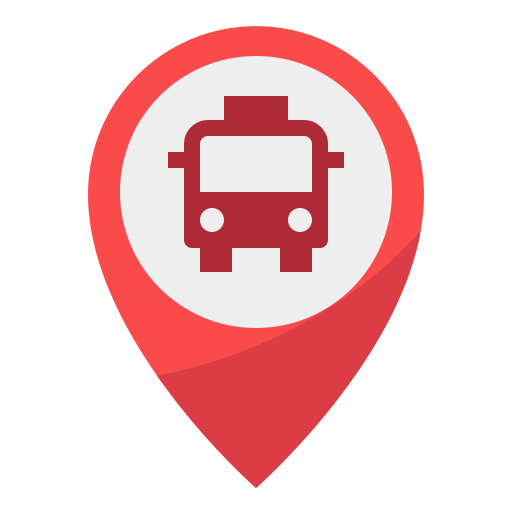
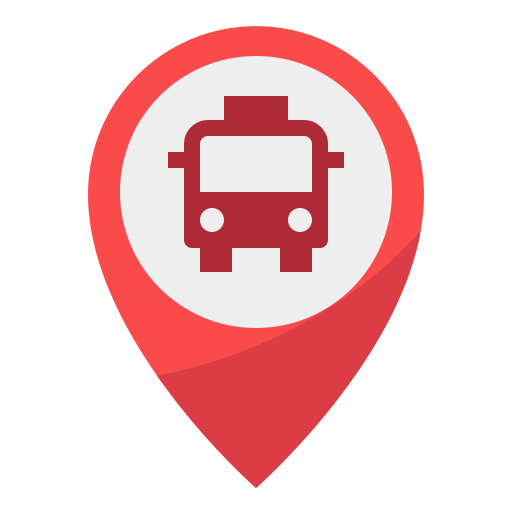
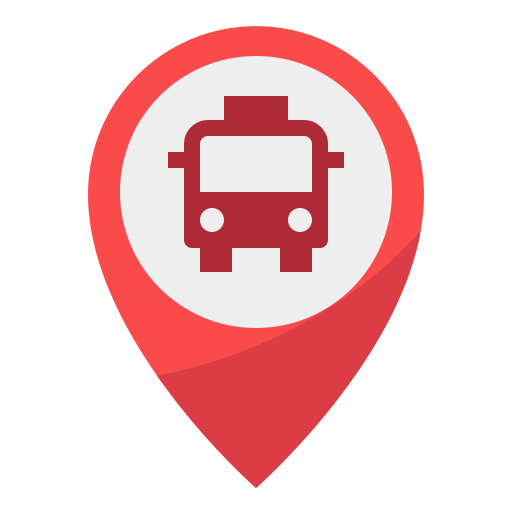
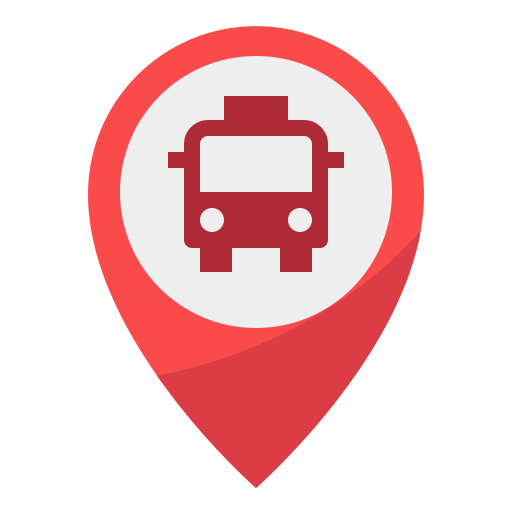
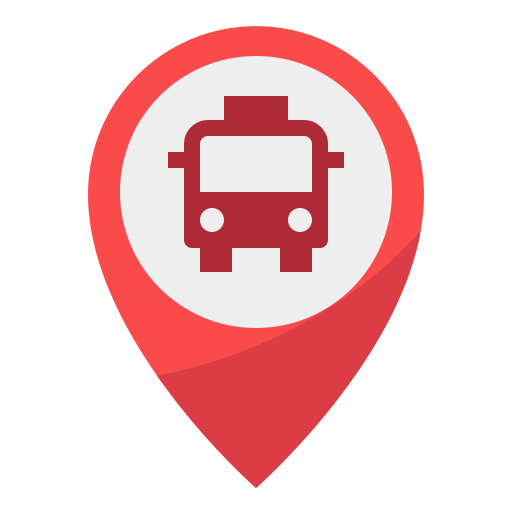
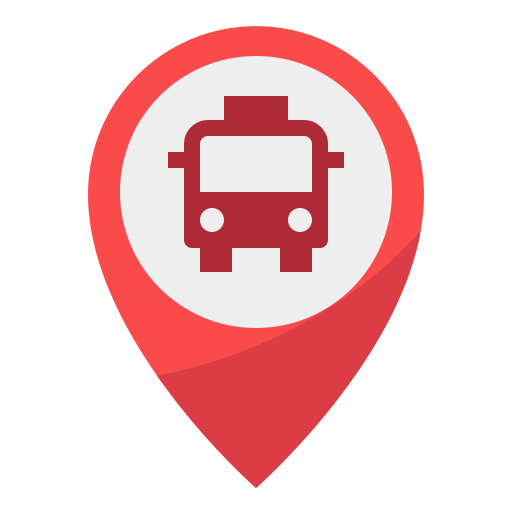
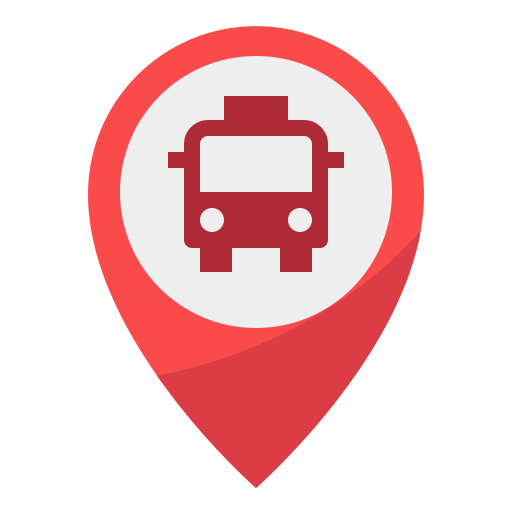
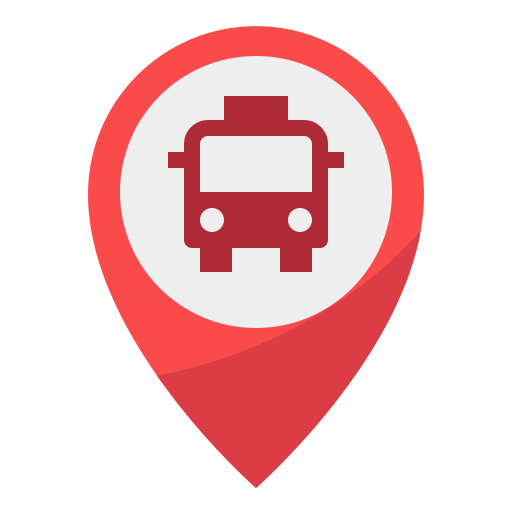
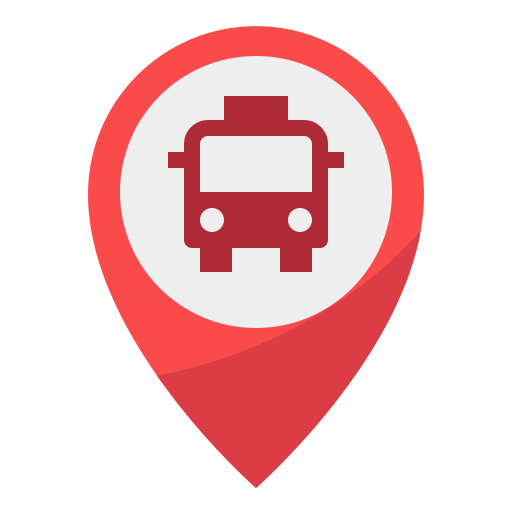
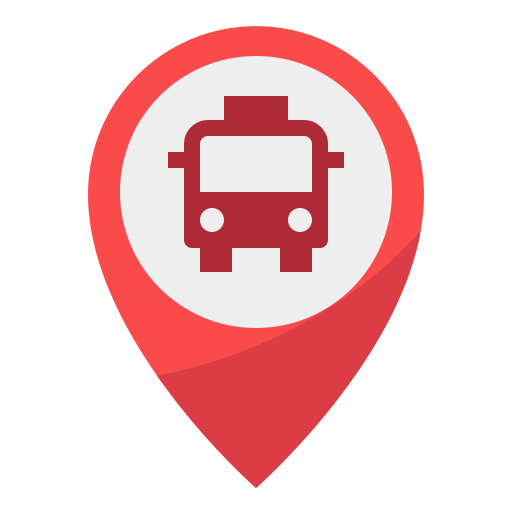
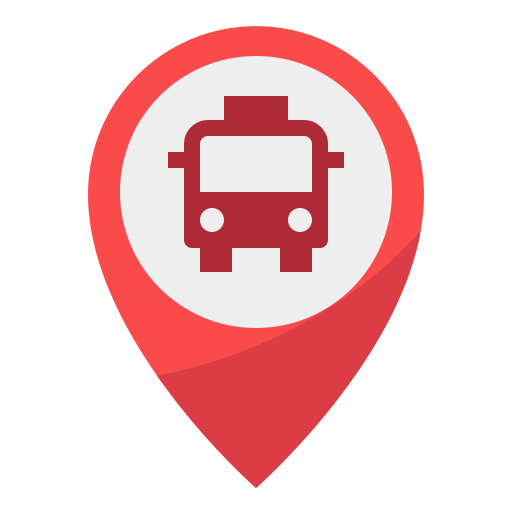
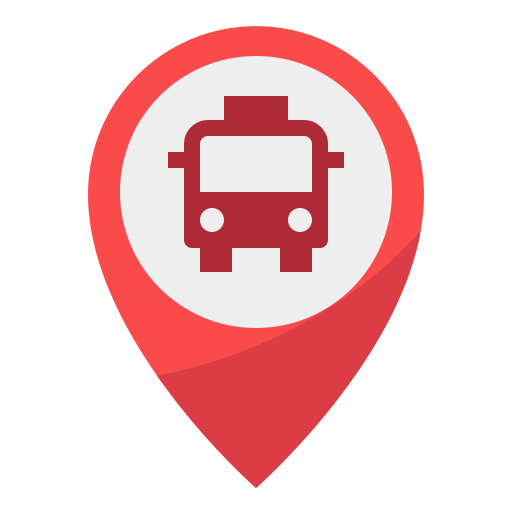
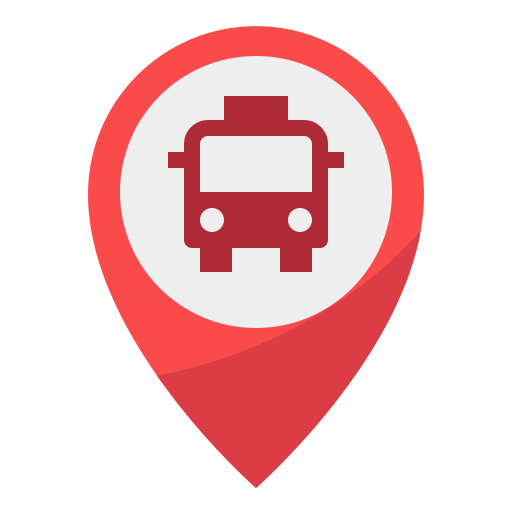
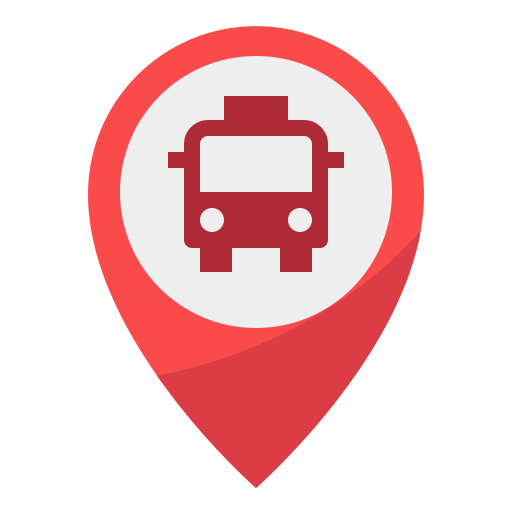
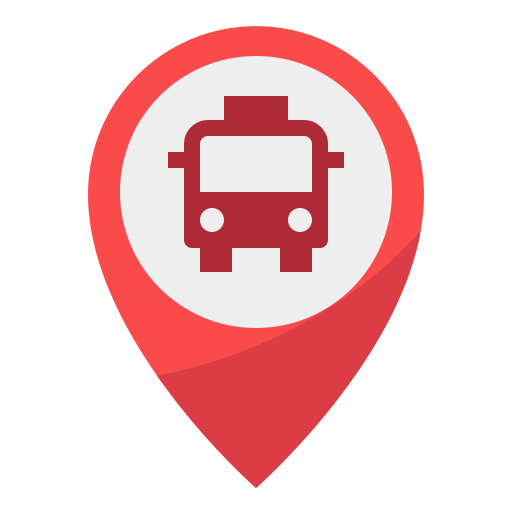
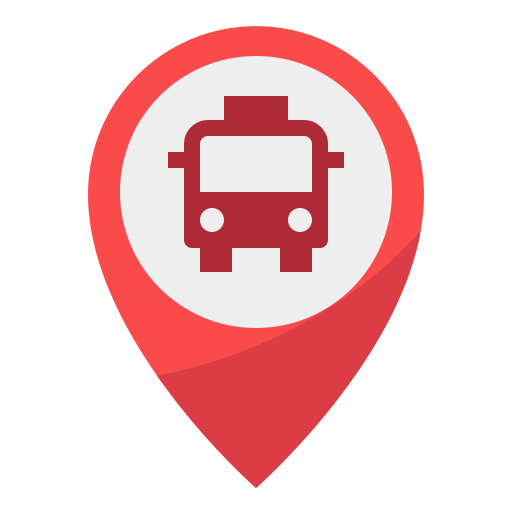
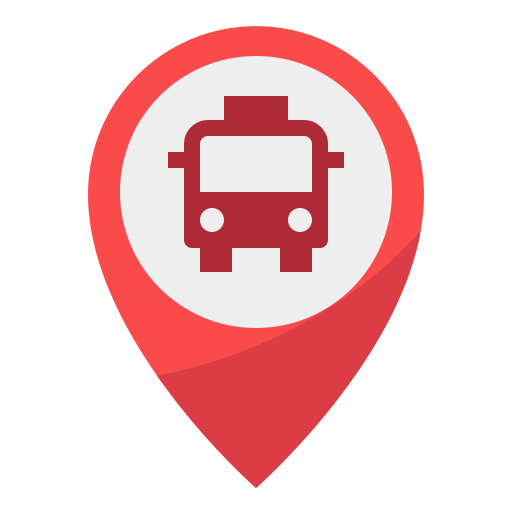
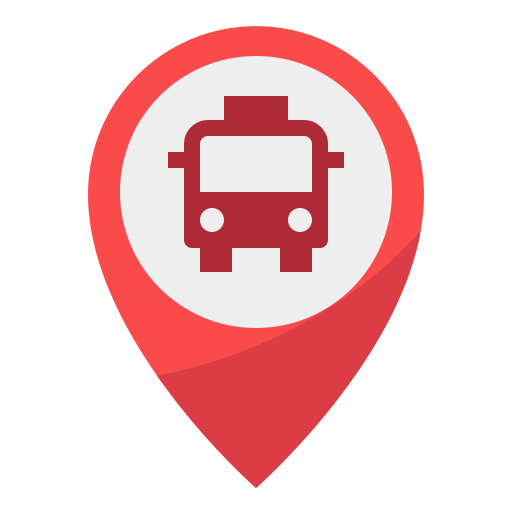
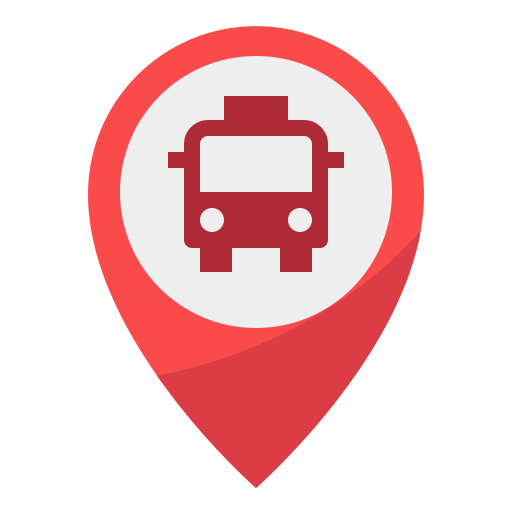
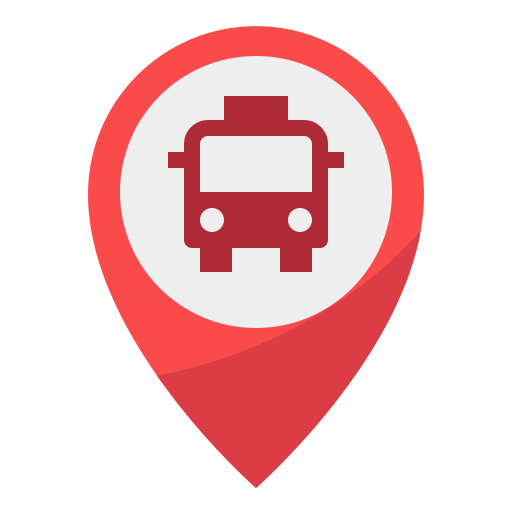
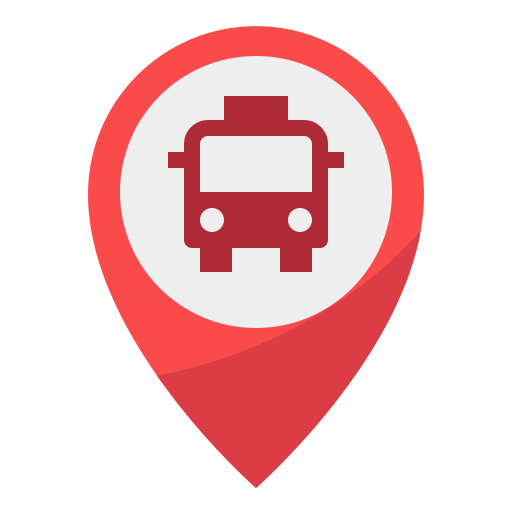
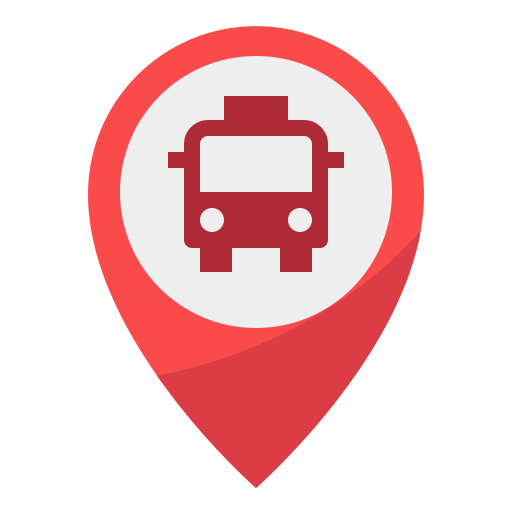
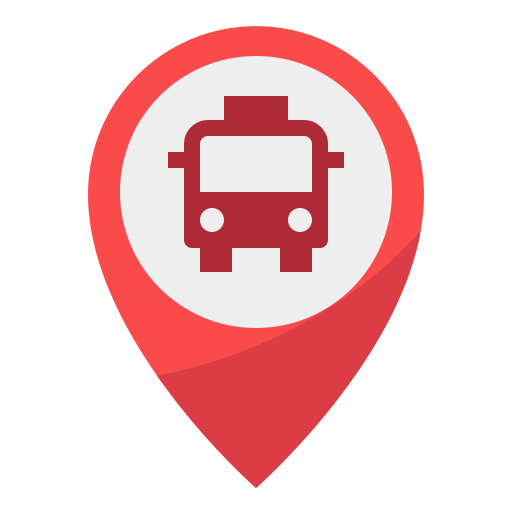
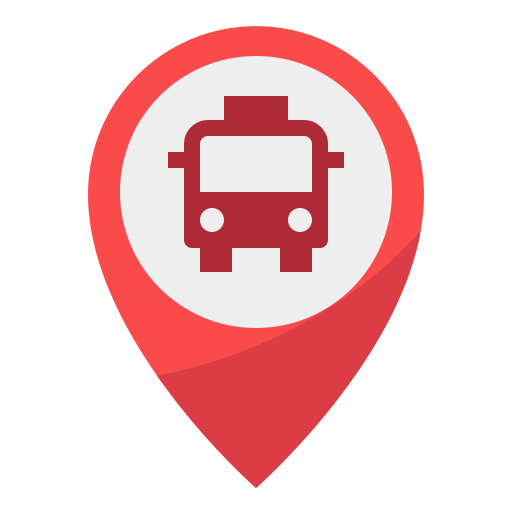
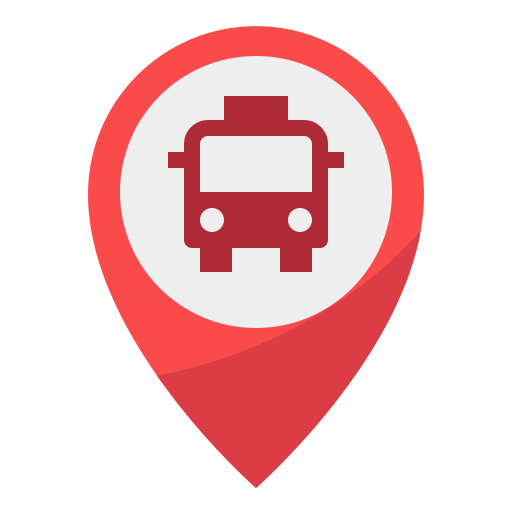
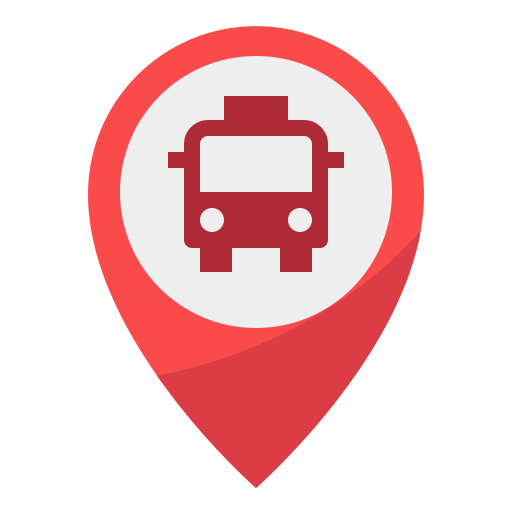
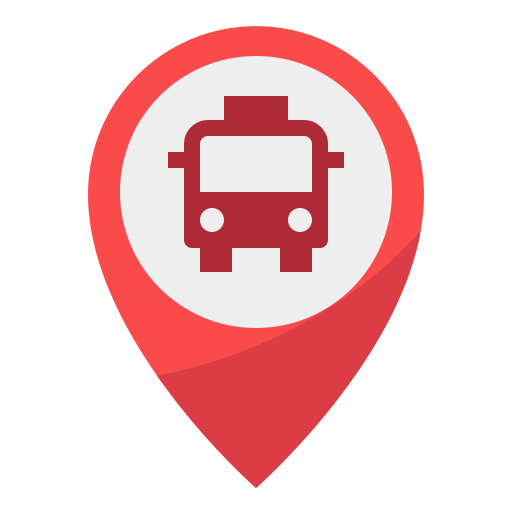
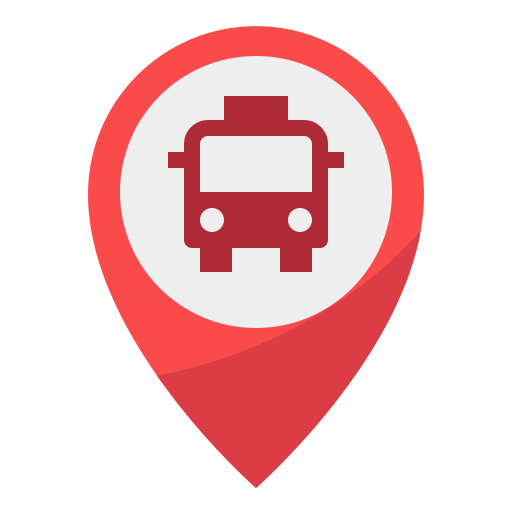
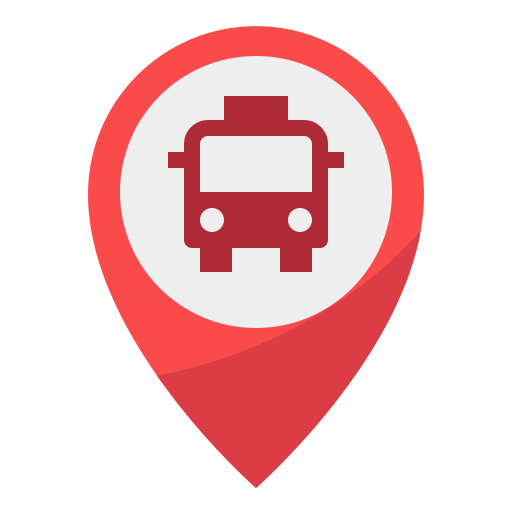
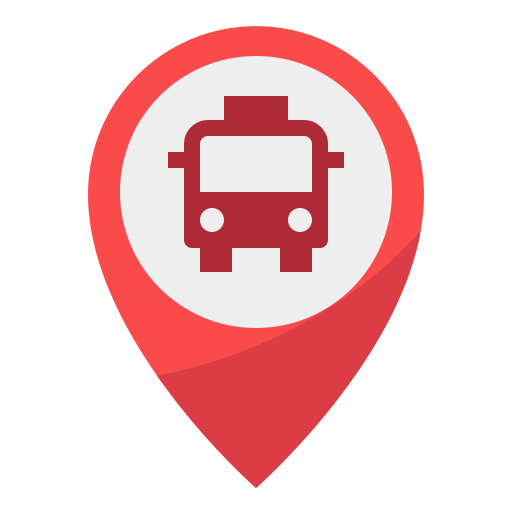
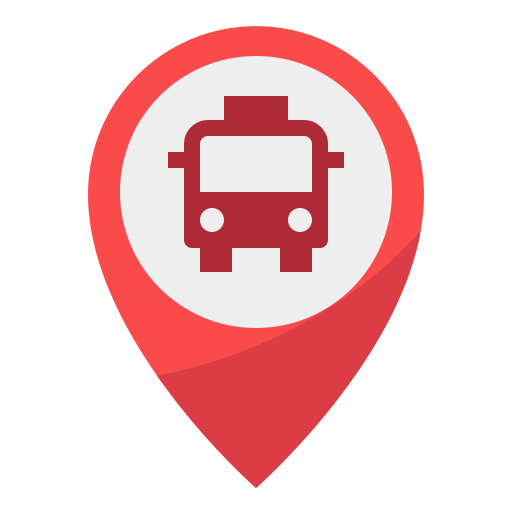

In [ ]:
import folium
from shapely.geometry import Point
import pandas as pd
from geopy.geocoders import Nominatim

# Get the location coordinates (latitude, longitude) for Kandy
kandy_location = geolocator.geocode("Kandy, Sri Lanka")
kandy_latitude = kandy_location.latitude
kandy_longitude = kandy_location.longitude

custom_icon_path = '../bus stop.png'  # Adjust the path as needed

# Function to create the map
def create_map():
    return folium.Map(location=Nattarampota_location, zoom_start=14)

# Function to plot a specific trip on the map
def plot_trip_on_map(bus_stops):
    m = create_map()  # Create a new map instance each time

    for index, row in bus_stops.iterrows():
        bus_stop_location = [row['latitude'], row['longitude']]
        
        # Add a marker for each point in the trip data
        folium.Marker(
            location=bus_stop_location,
            icon=folium.CustomIcon(
                icon_image=custom_icon_path,
                icon_size=(60, 60)  # Adjust the size as needed
            )
        ).add_to(m)
            
    return m

plot_trip_on_map(bus_stops)